#### 29.09.22, &copy; [Daniil Tereshchenko](https://www.linkedin.com/in/daniil-tereshchenko/), 2022

# Лабораторна робота №4. Алгоритми пошуку. Стратегія "грубої сили". (short version)

### Мета. _Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінки їх складності._ 

### Лінійний пошук. Стратегія "грубої сили"

Одним з найпростіших алгоритмів пошуку є [_лінійний пошук_](https://uk.wikipedia.org/wiki/%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B8%D0%B9_%D0%BF%D0%BE%D1%88%D1%83%D0%BA). Сенс алгоритму полягає в тому, що пошук починають з першого елементу масива. Якщо поточний елемент списку не дорівнює шуканому значенню, то здійснюється перехід до наступного елементу. Таким чином, у результаті кожної перевірки область пошуку зменшується на один елемент.  

Лінійний пошук також відомий, як _метод перебору_ або "грубої сили". Працює за час $O(n)$, де $n$ -- довжина списку на вході.

__Завдання на самостійну роботу:__ Оцінити асимптотичну складність алгоритму лінійного пошуку у $О$-нотації.

Розглянемо the worst випадок, коли шуканий елемент знаходиться в кінці вхідного масиву

In [19]:
def linear_search(a_list, x):
    i, length = 0, len(a_list)              # | c1 | 1
    while i < length and x != a_list[i]:    # | c2 | n
        i += 1                              # | c3 | n - 1
    return i if i < length else -1          # | c4 | 1


$$
T_{worst}(n) = c_{1} + c_{2}n + c_{3}(n-1) + c_{4}
$$

$$
T_{worst}(n) = n(c_{2} + c_{3}) - c_{3} + c_{1} + c_{4}
$$

Тепер функція $T(n)$ - лінійна, тобто має вид $T(n) = an + b$. (Константи $a$ і $b$ визначаються значеннями $c_{1}-c_{4}$.)


### Пошук у відсортованому масиві. Бінарний пошук 

Це класичний алгоритм пошуку елемента у відсортованому списку, який використовує дроблення масиву на половини. Алгоритм можна реалізувати рекурсивно. Нижче наведено [реалізацію](https://github.com/yorko/python_intro) для відсортованих списків без повторюваних елементів. Складність алгоритму - $O(log(n))$, де $n$ - довжина списку на вході.

_[Алгоритм](https://younglinux.info/algorithm/dichotomy) полягає у наступному._

1. Знаходиться середній елемент послідовності. Для цього перший і останній індекси зв'язуються зі змінними, а індекс середнього елемента обчислюється.  

2. Значення середнього елемента порівнюється з шуканим значенням. Залежно від того, більше воно чи менше значення середнього елемента, подальший пошук буде відбуватися тільки в лівій або тільки в правій половинах масиву. Якщо значення середнього елемента виявляється рівним шуканому, пошук завершується.  

3. Інакше одна з меж досліджуваної послідовності зсувається. Якщо шукане значення більше значення середнього елемента, то нижня межа зсувається за середній елемент на один елемент праворуч. Якщо шукане значення менше значення середнього елемента, то верхня межа зсувається на елемент перед середнім.

4. Знову знаходиться середній елемент тепер уже в обраній половині. Описаний вище алгоритм повторюється для даного зрізу.

__Завдання на самостійну роботу__:

### 1
Оцінити асимптотичну складність алгоритму бінарного пошуку пошуку у $О$-нотації.

In [89]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:                 
        return -1                                        
    middle = (left + right) // 2                           
    if a_list[middle] == x:                               
        return middle                                     
    elif (a_list[middle] < x):                            
        return bin_search(a_list, x, middle + 1, right)    
    else:                                                 
        return bin_search(a_list, x, left, middle - 1)    

$$
T_{worst}(n) = T(n/2) + O(1) = O(1) * lgn = O(lgn)
$$

In [90]:
import pandas as pd
import random
from random import choice
import time 
import matplotlib.pyplot as plt
import math

In [91]:
n=[5000,10000,50000,100000,200000,300000,400000,500000,750000,1000000,2000000,5000000,10000000]

In [92]:
#n = [50000,75000,100000,150000,200000,300000,500000]
#n = [2,3,4,5,6,7]
n = []
n.append(243)
q = 2
for i in range(1,15):
    n.append(n[i-1]*q)

In [93]:
size = len(n)

In [94]:
random_lists = []
keys = []

for y in range(0, size):
    random_lists.append(
        random.sample(range(1, n[y]+1), n[y])
    )
    #random_keys.append(random.sample(range(int(len(random_lists[y])/2), len(random_lists[y])), 1))
    (random_lists[y]).sort()
    keys.append(choice(random_lists[y]))
        #random_lists[y][(len(random_lists[y]))-1]

### 2
Написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де `n` -- розмір масиву для функції `linear_searh();

In [95]:
linear_time = []
for ite in range(0, len(n)):
    start_time = time.time()
    linear_search(random_lists[ite], keys[ite])
    linear_time.append(time.time() - start_time)
    
raw_datal = {'n': n, 'time': linear_time}
dfl = pd.DataFrame(data = raw_datal)
dfl

,n,time
0,243,0.000004
1,486,0.000014
2,972,0.000047
3,1944,0.000026
4,3888,0.000043
5,7776,0.000109
6,15552,0.000890
7,31104,0.002121
8,62208,0.005407
9,124416,0.003402


### 3
написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де `n` -- розмір масиву для функції `bin_searh();

In [96]:
binary_time = []
for ite in range(0, len(n)):
    start_time2 = time.time()
    bin_search(random_lists[ite], keys[ite], 0, len(random_lists[ite])-1)
    binary_time.append((time.time() - start_time2))
    
raw_data2 = {'n': n, 'time': binary_time}
dfb = pd.DataFrame(data = raw_data2)
dfb

,n,time
0,243,0.000004
1,486,0.000005
2,972,0.000005
3,1944,0.000007
4,3888,0.000005
5,7776,0.000006
6,15552,0.000006
7,31104,0.000014
8,62208,0.000010
9,124416,0.000009


#### 4
за результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву. Приклад побудови графіків у середовищі `Ipython` можна подивитися [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/).  

In [97]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='n'>

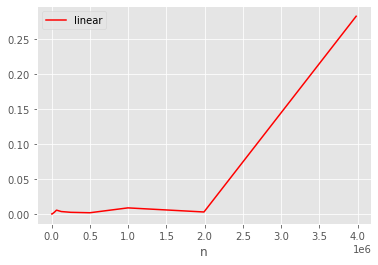

In [98]:
dfl.plot('n','time', color='r', label='linear', kind='line')

<AxesSubplot:xlabel='n'>

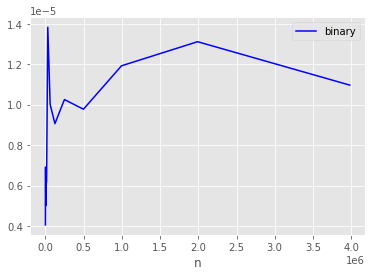

In [99]:
dfb.plot('n','time', color='b', label='binary', kind='line')

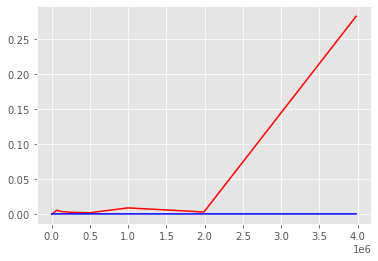

In [100]:
plt.plot(n,linear_time, color='r')
plt.plot(n,binary_time, color='b')

#### 5
оцінити, який з двох алгоритмів є більш ефективним та в якому діапазоні розміру задачі.

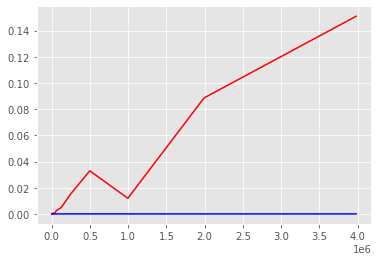

In [70]:
plt.plot(n,linear_time, color='r')
plt.plot(n,binary_time, color='b')

Як бачимо на графіку, завжди ефективнішим за $O(n)$ буде алгоритм який працює за $O(logn)$

### Завдання на лабораторну роботу.
1. Створити Notebook-документ за допомогою Jupyter Notebook. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)) і  реалізувати контрольні приклади, що розглядаються у даній роботі та виконати завдання, що винесено на самостійну роботу.

1. Дати відповіді на контрольні запитання.

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_4_StudentLasName.ipynb --to html`

1. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_4_StudentLasName.ipynb` та `lab_4_StudentLasName.html`

### Контрольні запитання.
1. Дати визначення складності задачі з символом $\Omega$.
Функція $f(N)$ має порядок $Ω(g(N))$, якщо $∃$ константи $c$ та $N0$, такі що $∀N>N_0$

$f(N)≥cg(N)$

$Ω(f(N))$ − клас функцій, обмежених знизу $cg(n)$

2. Функція часової складності має вигляд: $F(N)=N^3+7N^2-14N$. Як записати асимптотичну складність в нотації $O()$?
 $O(N^3)$

3. Функція часової складності має вигляд: $F(N)=1.01^N+N^{10}$. Як записати аисмптотичну складність в нотації $O()$?
 $O(N^{10})$

4. Функція часової складності має вигляд: $F(N)=N^{1.3}+10log_2N$. Як записати аисмптотичну складність в нотації $O()$?
 $O(log_2N)$
 
5. У чому полягає ідея розпараллелювання обчислень і для чого вона використовується? Які з алгоритмів, наведених у даній лаораторній роботі дозволяють можливість розпаралелювання?
Паралельні обчислення — це форма обчислень, в яких кілька дій проводяться одночасно. Ґрунтуються на тому, що великі задачі можна розділити на кілька менших, кожну з яких можна розв'язати незалежно від інших. Бінарний пошук дає можливість розпаралелювання.

6. Які існують шляхи підвищення обчислювальної швидкості алгоритмів? Який з них є найбільш ефективним?
Існує багато шляхів вимірювання використовуваних алгоритмом ресурсів. Два найбільш використовуваних вимірювання — швидкість і використовувана пам'ять. Інші вимірювання можуть включати швидкість, тимчасове використання диска, тривале використання диска, споживання енергії, сукупна вартість володіння, час відгуку на зовнішні сигнали тощо. Багато з цих вимірювань залежать від обсягу вхідних даних алгоритму (тобто від кількостей даних, що вимагають обробки). Вимірювання можуть також залежати від того, як подані дані (наприклад, деякі алгоритми сортування погано працюють на вже відсортованих даних або коли дані відсортовані в зворотному порядку).На практиці існують й інші чинники, що впливають на ефективність алгоритму, такі як необхідна точність або надійність.

# References

1.Лінійний пошук(http://kytok.org.ua/post/alhorytm-linijnoho-poshuku)

2.Бінарний пошук(http://surl.li/cestb)

3.Ефективність алгоритмів(https://uk.wikipedia.org/wiki/Ефективність_алгоритму).